<a href="https://colab.research.google.com/github/mishra28soumya/TensorFlow-for-Deep-Learning/blob/master/2_Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Basics

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

`f=c×1.8+32`

We will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100). Then, we will train a model that figures out the above formula through the training process.

#Import Dependencies

We will import TensorFLow and Numpy. Numpy helps us represent our data as highly performant lists

# Import dependencies

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Setting up training data
There are two lists `celsius_q` and `fahrenheit_a` that will be used ti train our model

In [0]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

# Create the model
We will use a dense network. Since the problem is straightforward, this network will require only a single layer with a single neuron.

**Build a layer**

We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

`input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

`units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Assemble layers into the model
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [0]:
model = tf.keras.Sequential([l0])

**Note**
Layers can also be defined inside the model definition, rather than beforehand:


```
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1]
])
```



# Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:


*   **Loss function** — A way of measuring how far off predictions are from the 
desired outcome. (The measured difference is called the "loss".)
*   **Optimizer function** — A way of adjusting internal values in order to reduce the loss.








In [0]:
model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (**which is really a math function**) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning.

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available.

One part of the Optimizer you may need to think about when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

# Train the model
Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [0]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

# Display training statistics
The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`


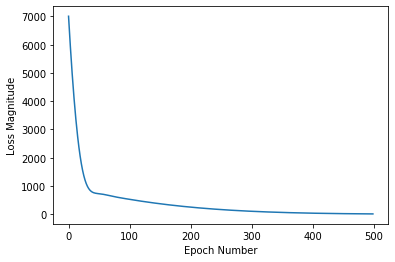

In [0]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


# Use the model to predict values

In [0]:
print(model.predict([100.0]))

[[211.28525]]


**To review**


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)



# Looking at the layer weights
Finally, let's print the internal variables of the Dense layer.

In [0]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8277317]], dtype=float32), array([28.512075], dtype=float32)]


# Experiment
Created more Dense layers with different units, which therefore also has more variables

In [0]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training model
[[211.74747]]
Model predicts that 100 degrees Celsius is: [[211.74747]] degrees Fahrenheit
These are the l0 variables: [array([[-0.09948504, -0.75779897,  0.11792095, -0.12243925]],
      dtype=float32), array([ 3.054698 , -3.3620958,  2.1642065,  2.2499893], dtype=float32)]
These are the l1 variables: [array([[ 0.10639735,  0.24247222,  0.7630335 ,  0.9072889 ],
       [ 0.8704601 , -0.38755712, -0.8030835 , -1.2829027 ],
       [ 0.29945695,  0.03533635,  0.36789355,  0.4139505 ],
       [-0.20104519, -0.5005894 ,  0.9138623 ,  0.58716047]],
      dtype=float32), array([-1.952873 ,  2.3199525,  3.2352238,  3.318169 ], dtype=float32)]
These are the l2 variables: [array([[-0.2507222 ],
       [ 0.23891138],
       [ 0.89820015],
       [ 1.3366708 ]], dtype=float32), array([3.2127516], dtype=float32)]


# The training process
The training process (happening in `model.fit(...)`) is really about tuning the internal variables of the networks to the best possible values, so that they can map the input to the output. This is achieved through an optimization process called Gradient Descent, which uses Numeric Analysis to find the best possible values to the internal variables of the model.

Gradient descent iteratively adjusts parameters, nudging them in the correct direction a bit at a time until they reach the best values. In this case “best values” means that nudging them any more would make the model perform worse. The function that measures how good or bad the model is during each iteration is called the “loss function”, and the goal of each nudge is to “minimize the loss function.”

The training process starts with a forward pass, where the input data is fed to the neural network. Then the model applies its internal math on the input and internal variables to predict an answer 
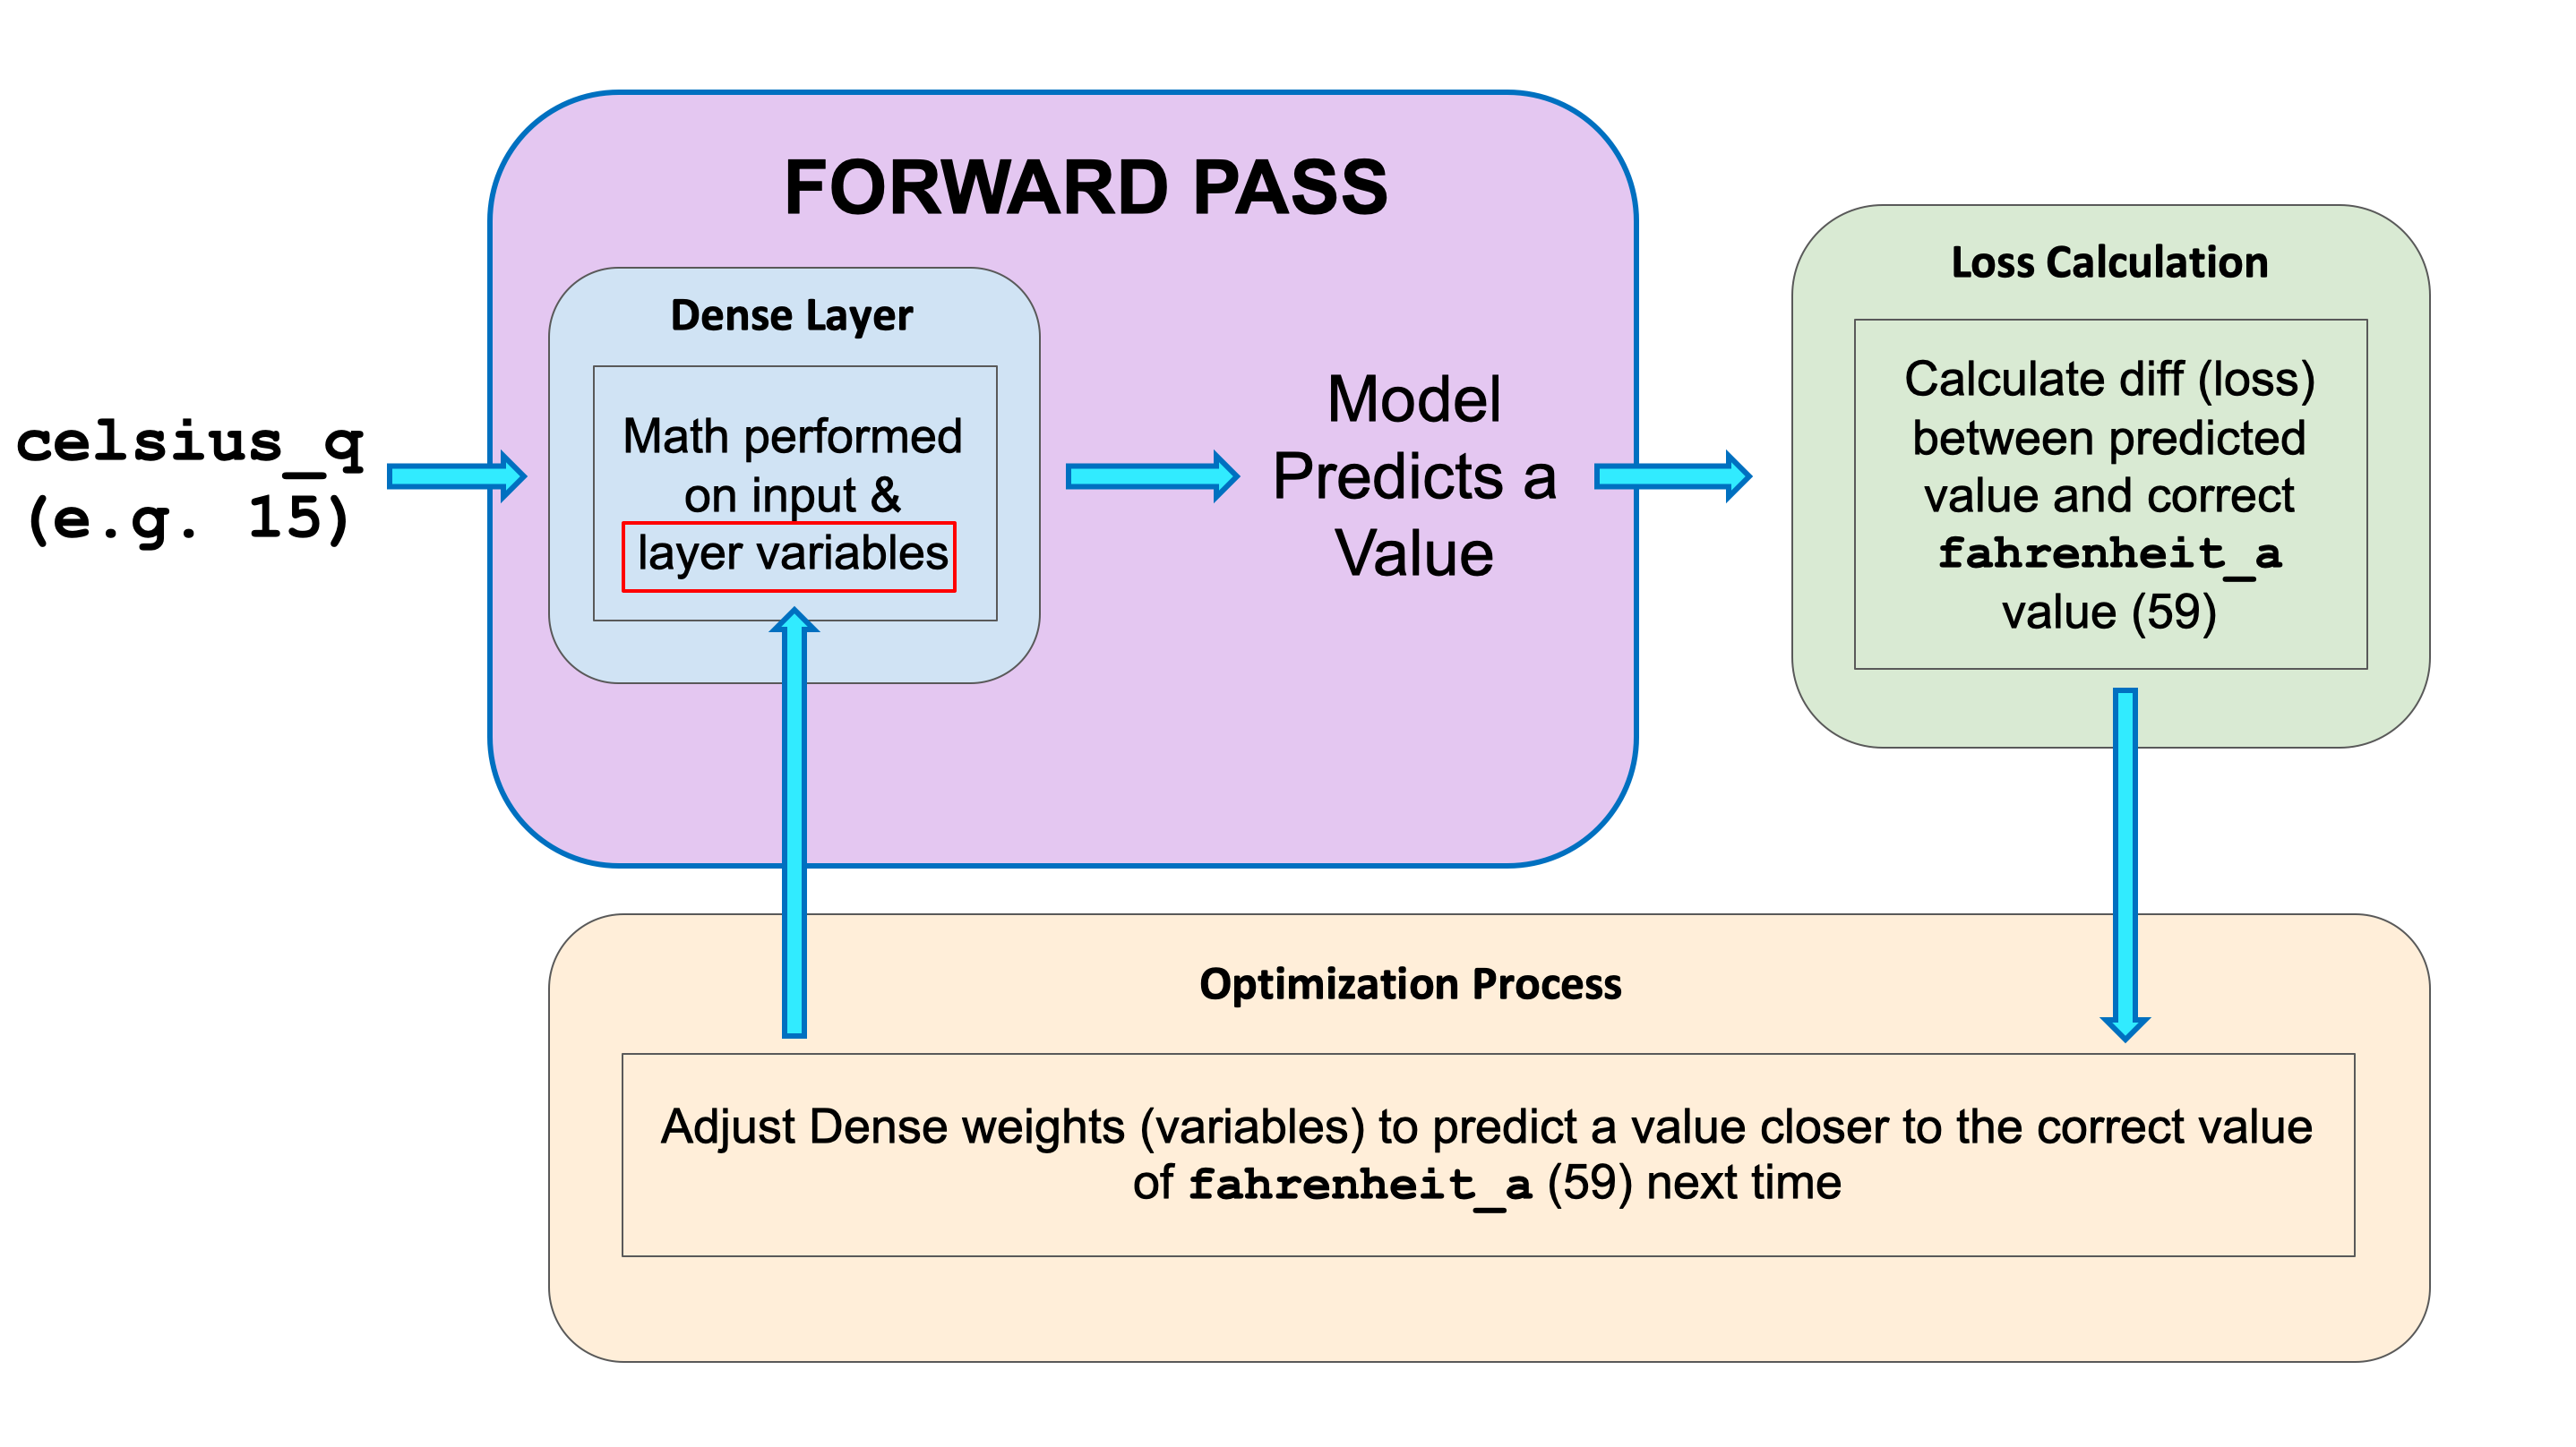

# Terms
1. Feature: The input(s) to our model
2. Examples: An input/output pair used for training
3. Labels: The output of the model
4. Layer: A collection of nodes connected together within a neural network.
5. Model: The representation of your neural network
6. Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.
7. Weights and biases: The internal variables of model
8. Loss: The discrepancy between the desired output and the actual output
9. MSE: Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.
10. Gradient Descent: An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.
11. Optimizer: A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)
12. Learning rate: The “step size” for loss improvement during gradient descent.
13. Batch: The set of examples used during training of the neural network
14. Epoch: A full pass over the entire training dataset
15. Forward pass: The computation of output values from input
16. Backward pass (backpropagation): The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.


We created a simple model to convert temperature from Celsius to Fahrenhiet where we used a simple neural network to find the relationship between input and output.
Our network has a single dense layer
We can think of a neural network as a stack of layers where each layer is made up of units. These units are also called neurons. The neurons in each layer can be connected to neurons in the following layer. So each neuron is fully connected to all the neurons in the previous layer. These type of layers are fully connected or dense layers.
So when we use a dense layer in keras we are simply stating that the neurons in that layers are fully connected to the neurons in the previous layer.
A layer has map that's applied to internal variables in it.
Within the neurons there are internal variables also known as weights and biases and its their values that get adjusted during the training process to enable the model best match the inputs to the outputs.